<a href="https://colab.research.google.com/github/sreeramdnair/Artificial-Neural-Networks/blob/main/Stock_prediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
df=pd.read_csv('AAPL_5years.csv',index_col="Date",parse_dates=True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-08-16,27.407499,27.557501,27.302500,27.344999,25.645245,135177600
2016-08-17,27.275000,27.342501,27.084999,27.305000,25.607737,101424000
2016-08-18,27.307501,27.400000,27.254999,27.270000,25.574909,87938800
2016-08-19,27.192499,27.422501,27.090000,27.340000,25.640558,101472400
2016-08-22,27.215000,27.275000,26.962500,27.127501,25.441267,103280800
...,...,...,...,...,...,...
2021-08-09,146.199997,146.699997,145.520004,146.089996,146.089996,48908700
2021-08-10,146.440002,147.710007,145.300003,145.600006,145.600006,69023100
2021-08-11,146.050003,146.720001,145.529999,145.860001,145.860001,48493500


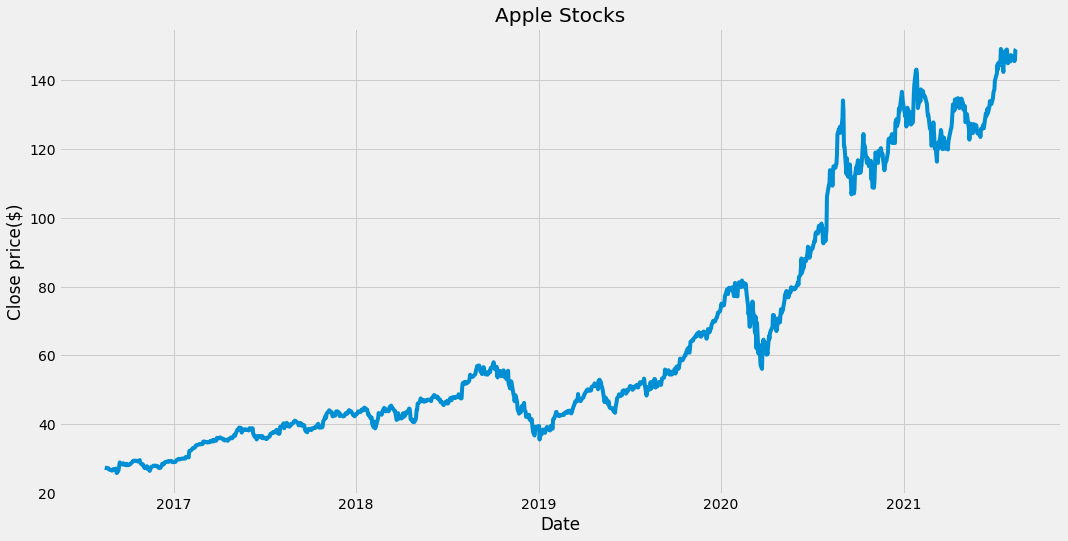

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Apple Stocks")
plt.plot(df["Close"])
plt.xlabel('Date')
plt.ylabel('Close price($)')
plt.show()

In [ ]:
data=df.filter(['Close'])
dataset_array=data.values

count_traning=math.ceil(len(dataset_array)*.8) # 201 rows
count_traning

1007

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset_array)
scaled_data

array([[0.01266541],
       [0.01234118],
       [0.01205748],
       ...,
       [0.97333177],
       [0.99789252],
       [0.9995948 ]])

In [ ]:
training_data=scaled_data[0:count_traning,:]
x_train=[]
y_train=[]
for i in range(60,len(training_data)):
  x_train.append(training_data[i-60 :i,0]) # training the model on past 60  days
  y_train.append(training_data[i,0])  #predicting the value of 61st day
 
  

In [ ]:
x_train,y_train=np.array(x_train),np.array(y_train)


In [ ]:
x_train.shape

(947, 60)

In [ ]:
# coverting into 3 dimension
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(947, 60, 1)

In [ ]:
#model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [ ]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train,y_train,batch_size=1,epochs=2)

Epoch 1/2
947/947 [==============================] - 24s 25ms/step - loss: 6.0856e-04
Epoch 2/2
947/947 [==============================] - 23s 25ms/step - loss: 3.8934e-04


In [ ]:
#testing
test_data=scaled_data[count_traning-60: , :]
x_test=[]
y_test=dataset_array[count_traning:, :]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i, 0])



In [ ]:
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
prediction=model.predict(x_test)
prediction=scaler.inverse_transform(prediction)

In [ ]:

rmse=np.sqrt(np.mean(prediction-y_test)**2)
print("RMSE:---->>",rmse)

RMSE:---->> 3.127589922053972


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


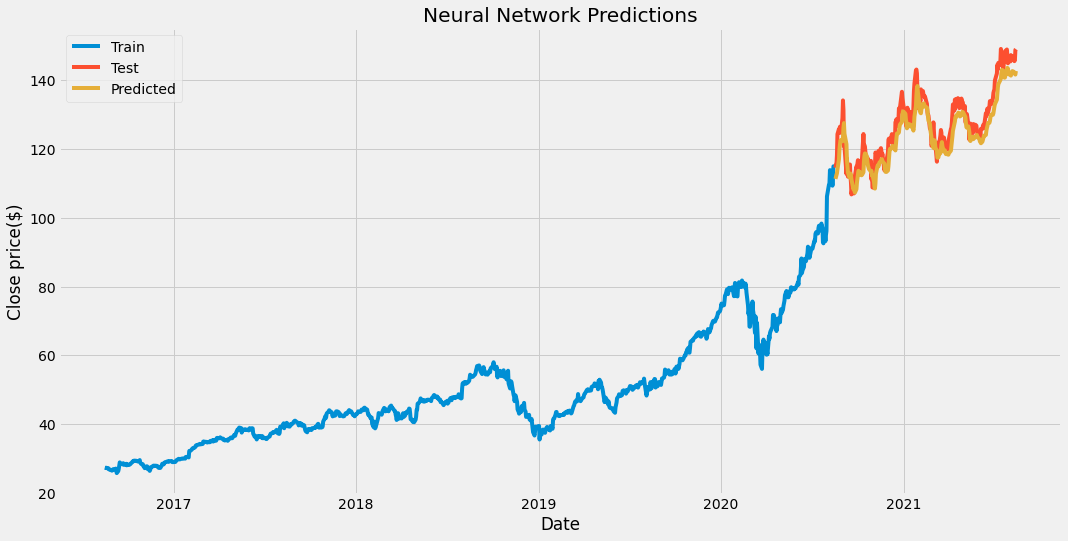

In [ ]:
trained_data=data[:count_traning]
test_predicted=data[count_traning:]
test_predicted['predicted']=prediction

#plotting the data
plt.figure(figsize=(16,8))
plt.title("Neural Network Predictions")
plt.xlabel('Date')
plt.ylabel('Close price($)')
plt.plot(trained_data['Close'])
plt.plot(test_predicted[['Close','predicted']])
plt.legend(['Train','Test','Predicted'])
plt.show()


In [ ]:
test_predicted.tail()

,Close,predicted
Date,,
2021-08-09,146.089996,142.502213
2021-08-10,145.600006,142.233521
2021-08-11,145.860001,141.865891
2021-08-12,148.889999,141.704651
2021-08-13,149.100006,142.721329
